## 2D interpolation 

In [1]:
import jax.numpy as jnp
import numpy as np
from jax.numpy import searchsorted, clip, where
from jax import jit

In [2]:
#from jax/_src/numpy/lax_numpy.py in jax
def interp1d(x, xp, fp, left=None, right=None,):
    i = clip(searchsorted(xp, x, side='right'), 1, len(xp) - 1)
    df = fp[i] - fp[i - 1]
    dx = xp[i] - xp[i - 1]
    delta = x - xp[i - 1]
    f = where((dx == 0), fp[i], fp[i - 1] + (delta / dx) * df)
    
    f = where(x < xp[0], fp[0] if left is None else left, f)
    f = where(x > xp[-1], fp[-1] if right is None else right, f)
    return f

In [3]:
def f(x):
    return x*x

In [4]:
xarr=jnp.linspace(-1,1,10)
farr=f(xarr)

In [5]:
def g(x):
    return interp1d(x, xarr, farr)

In [6]:
g(0.21)

Buffer(0.05629629, dtype=float32)

In [7]:
@jit
def interp2d(x, y, xp, yp, fp, left=None, right=None):
    i = clip(searchsorted(xp, x, side='right'), 1, len(xp) - 1)
    j = clip(searchsorted(yp, y, side='right'), 1, len(yp) - 1)
    dfx = fp[i,j] - fp[i - 1,j]
    dx = xp[i] - xp[i - 1]
    deltax = x - xp[i - 1]
    
    dfy = fp[i,j] - fp[i,j - 1]
    dy = yp[j] - yp[j - 1]
    deltay = y - yp[j - 1]
    
    f = fp[i - 1, j - 1] + (deltax / dx) * dfx + (deltay / dy) * dfy
    return f

In [8]:
def ff(x,y):
    return x*x + y*y

In [9]:
xarr=jnp.linspace(-1,1,11)
yarr=jnp.linspace(-1,1,11)
onearr=jnp.ones((len(xarr),len(yarr)))
xa=xarr[:,None]*onearr
ya=yarr[None,:]*onearr
farr=ff(xa,ya)

In [10]:
import matplotlib.pyplot as plt 
plt.imshow(farr)
plt.show()

<Figure size 640x480 with 1 Axes>

In [11]:
xarrq=jnp.linspace(-1,1,101)
yarrq=jnp.linspace(-1,1,101)

fi=np.zeros((len(xarrq),len(yarrq)))
for i,x in enumerate(xarrq):
    for j,y in enumerate(yarrq):
        fi[i,j]=interp2d(x, y, xarr, yarr, farr)

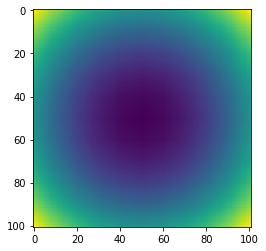

In [12]:
import matplotlib.pyplot as plt 
plt.imshow(fi)
plt.show()

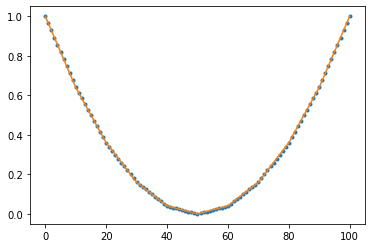

In [13]:
plt.plot(fi[50,:],".")
plt.plot(fi[50,:])

In [ ]:
# addit installed version

In [14]:
from addit.interpolate import interp2d

In [31]:
xarrq=jnp.linspace(-1,1,101)
yarrq=jnp.linspace(-1,1,101)

fi=np.zeros((len(xarrq),len(yarrq)))
for i,x in enumerate(xarrq):
    for j,y in enumerate(yarrq):
        fi[i,j]=interp2d(x, y, xarr, yarr, farr)

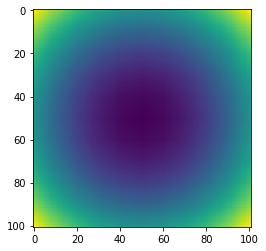

In [16]:
import matplotlib.pyplot as plt 
plt.imshow(fi)
plt.show()

In [ ]:
# df/dx**2 + df/dy**2

In [27]:
from jax import gradq
dgx=jit(grad(interp2d,argnums=0))
dgy=jit(grad(interp2d,argnums=1))

In [28]:
dgx(0.0,0.0,xarr,yarr,farr)
dgy(0.0,0.0,xarr,yarr,farr)

DeviceArray(0.20000003, dtype=float32)

In [32]:
vi=np.zeros((len(xarrq),len(yarrq)))
for i,x in enumerate(xarrq):
    for j,y in enumerate(yarrq):
        dx=dgx(x,y,xarr,yarr,farr)
        dy=dgy(x,y,xarr,yarr,farr)
        vi[i,j]=dx**2+dy**2

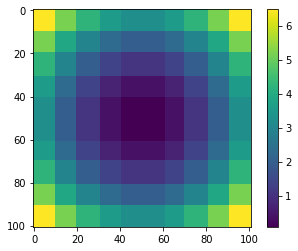

In [34]:
import matplotlib.pyplot as plt 
c=plt.imshow(vi)
plt.colorbar(c)
plt.show()